In [1]:
import numpy as np

from snn.graphs import plot_network
from utils import njit
from utils import timing
from matplotlib import pyplot as plt
from snn.resonator import create_excitatory_resonator, create_sine_wave

In [2]:
@njit
def test_frequency(network, test_size=10_000_000, start_freq=0, step=1 / 200000, clk_freq=1536000):
    batch_size = 50_000
    shift = 0
    while test_size > 0:
        sine_size = min(batch_size, test_size)
        sine_wave, freqs = create_sine_wave(sine_size, clk_freq, start_freq, step, shift)

        network.input_full_data(sine_wave)

        shift = freqs[-1]
        start_freq += sine_size * step
        test_size -= sine_size

def custom_resonator_output_spikes(freq0, clk_freq=int(1.536 * (10 ** 6)) * 2, step=1/12_000):
    my_resonator = create_excitatory_resonator(freq0=freq0, clk_freq=clk_freq)
    plot_network(my_resonator)
    # my_resonator = create_excitatory_inhibitory_resonator(freq0=freq0, clk_freq=clk_pulse)
    log_neuron_potentials = []
    for i in log_neuron_potentials:
        my_resonator.log_membrane_potential(i)
    my_resonator.log_out_spikes(-1)
    # plot_network(my_resonator.network)
    start_freq = 0
    spectrum = 2 * freq0
    test_size = int(spectrum / step)
    spikes_neuron = my_resonator.neurons[-1]

    spikes_neuron.membrane_sample_max_window = np.zeros(1).astype('float32')
    t = timing(test_frequency, return_res=False, return_time=True)(my_resonator,
                                                                   start_freq=start_freq, step=step,
                                                                   test_size=test_size, clk_freq=clk_freq)

    for i in log_neuron_potentials:
        membrane_neuron = my_resonator.neurons[i]
        y_membrane = membrane_neuron.membrane_potential_graph()
        x = np.linspace(start_freq, start_freq + spectrum, len(y_membrane))
        plt.title(f'membrane potential f={freq0}, neuron={i}')
        plt.plot(x, y_membrane)
        plt.show()

    y_spikes = spikes_neuron.out_spikes[:spikes_neuron.index]

    # np.savez_compressed(f'output_{freq0}.npz',
    #                     membrane=y_membrane,
    #                     spikes=y_spikes)

    spikes_window_size = 5000
    y_spikes = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
    x = np.linspace(start_freq, start_freq + spectrum, len(y_spikes))
    plt.title(f'spikes in window of {spikes_window_size} freq: {freq0}')
    plt.plot(x, y_spikes)
    plt.show()

<string>:3: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.


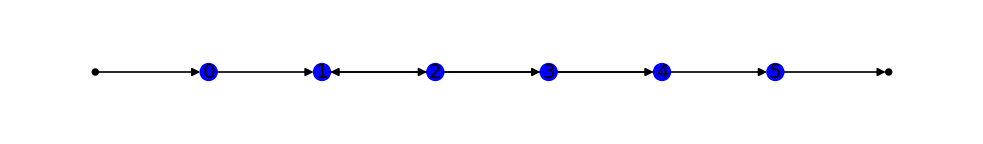

func:test_frequency args:((<numba.experimental.jitclass.boxing.SpikingNetwork object at 0x0000022562223910>,), {'start_freq': 0, 'step': 8.333333333333333e-05, 'test_size': 4800000, 'clk_freq': 3072000}] took: 14.0638 sec


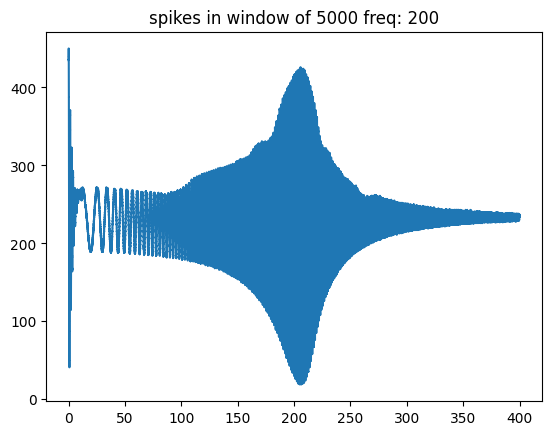

In [3]:
custom_resonator_output_spikes(200)